# Kaj Meijer, 10509534

# Lotte Philippus, 11291168

In [6]:
from scipy import stats
import numpy as np
import random

%matplotlib inline
import matplotlib.pyplot as plt

# Q-Learning

Q-learning algorithmes zijn gebaseerd op de TD-learning modellen die we eerder hebben besproken. Q-learning leert direct de associatie tussen states, actions en outcomes. De robot gaat nu dus niet alleen maar belongingen krijgen maar ook uitzoeken welke handeling de beste is geveven de situatie. 

Details over Q-learning zijn terug te vinden in de college slides en het hoofdstuk van Gureckis & Love [**computational reinforcement learning**](http://bradlove.org/papers/GureckisLovePress.pdf) en voor meer verdieping in het online boek van [**Sutton & Barto**](http://incompleteideas.net/book/bookdraft2018jan1.pdf) en dan met name hoofdstuk 6.

Het leren in deze opdracht speelt zich af in een simpel **Markov Decision Process** met de volgende structuur:

![](bandit_arms.png)

In deze taak moet de robot telkens uit een van de schatkisten iets pakken. In sommige schatkisten zit meer geld dan in anderen, maar de robot weet in het begin nog niks over de schatkisten, en verwacht er maar weinig van. In elke ronde wordt uitkomst van een schatkist bepaald door een trekking van een waarde uit een normaalverdeling.

De uitkomsten van schatkisten verschillen in hun gemiddelde maar niet de variatie (standaard deviatie). 

**Let op:** In dit simpele experiment is er maar een state, waarin de robot telkens terugkeert na het maken van een keuze. Dit heeft als gevolg dat bij het leren geen rekening gehouden hoeft te worden met de actie in de volgende state gemaakt wordt. De standaard prediction-error:

$$\delta = r_{t+1} + \gamma\ max_a\ Q(s_{t+1} , a) − Q(s_t , a_t)$$

verandert dus simpelweg in:
$$\delta = r_{t+1} − Q(s_t , a_t)$$

In het begin van het experiment heeft de robot geen enkele kennis van de wereld en geen enkele verwachtingen voor van het krijgen van beloningen. Voor elke schatkist geldt:

$$Q(1)=Q(2)=Q(3)=Q(4)=0$$



### Q1.a (5 punten)

Schrijf de Q-learning functie op die de nieuwe waarde Q uitrekent nadat de robot een schatkist heeft uitgekozen. Welke vrije variabele heeft deze functie en wat is zijn rol in leren? 


Q is de leerwaarde.
r is de beloning.
s is de staat.
a is de actie.
alpha is de leersnelheid en is de vrije variabele.

In [10]:
def update_Q(Q, r, s, a, alpha):
    return Q[s, a] + alpha*(r - Q[s, a])

### Q1.b (5 punten)

Stel de robot selecteert schatkist 1 en vindt twee munten. Wat is hierna de waarde van Q(1)? rapporteer dit voor
$\alpha=0.5$ en $\alpha=0.2$

In [148]:
def printQ(alpha):
    
    Q = np.zeros((1, 4))
    s = 0
    a = 1
    r = 2
    Q[s, a] = update_Q(Q, r, s, a, alpha)
    print(Q)


alpha = 0.5
printQ(alpha)

alpha = 0.2
printQ(alpha)


[[0. 1. 0. 0.]]
[[0.  0.4 0.  0. ]]


### Q1.c (10 punten)

Schrijf een functie `q_learn` die als input, alpha ($\alpha$), epsilon($\epsilon$) en rondes (trials) accepteert. De output van deze functie moet een lijst met $Q$ waarden zijn voor elke schatkist (1 t/m 4) in de wereld van de robot na het leren van een aantal rondes. We gaan er nu van uit dat de robot de $\epsilon$-greedy keuze regel toepast.

* Initieer de verwachtingen van de robot voor de 4 keuzes:
    * Q(1)=Q(2)=Q(3)=Q(4)=0. 
* Intieer total_score = 0
* Initieer de beloningen voor de 4 schatkisten:
    * K(1): mean=20, SD=4
    * K(2): mean=30, SD=4
    * K(3): mean=50, SD=4
    * K(4): mean=70, SD=4
* Creëer een for-loop over alle rondes:
    * Elke ronde selecteert de robot een kist op basis van $\epsilon$-greedy. Denk er aan bij explore een random kist, bij exploit de kist met hoogste Q-value (als er meerdere de hoogste waarde hebben, daar weer random uit kiezen). 
    * Kijk wat de beloning is na maken van een keuze, en update dan Q-value van die kist. 
* zorg dat deze functie de volgende lijsten als output heeft: final Q values, total_score, en voor elke schatkist een lijst wanneer deze gekozen werd (1 voor gekozen een 0 wanneer niet gekozen). Dit resulteert in 4 lijsten met keuzes die gebruikt kunnen worden voor het plotten van het gedrag van het model.


Laat me behulp van deze functie de robot 200 rondes leren over deze wereld (1 leer episode bestaat dus uit 200 rondes). Hoe zien zijn verwachtingen (Q-values) voor de schatkisten aan het eind van het experiment er uit gegeven

1. $\alpha = 0.1$ en $\epsilon = 0.1$
2. $\alpha = 0.5$ en $\epsilon = 0.1$

Laat voor beide modellen zien wat de totale verdiende score is gedurende de trails, wat de geleede Q-values zijn voor elke kist en plot hoe de keuzes voor de verschillende kisten veranderen gedurende de trails.

Voor het plotten van keuzes is het handig om naar het gemiddels van bins van 10 trails tegelijk te kijken. Alvast wat code om je beetje op weg te helpen:
```python
# Width is de grote van elke bin
width = 10
# Hier knippen we de laatste (choicelist_1.size % width) elementen van de lijst
# Dan reshapen we naar een matrix van X * width en nemen we de mean over de width axis
# Hiermee krijgen we dus het gemiddelde aantal keer dat deze keuze gemaakt is voor width stappen
result1 = choicelist_1[:(choicelist_1.size // width * width)].reshape(-1, width).mean(axis=1)
plt.plot(result1, label=r"$1$")
```

Welk van de twee geleerde modellen zit dichter bij de waarheid op basis van deze resultaten?


Model 2 met $\alpha = 0.5$ zit dichter bij de waarheid, want de Q-waarden zitten dichter bij de means. 

In [149]:
def q_learn(alpha, epsilon, trials = 200):
    
    # initialize starting values
    Q = np.zeros((1, 4))
    total_score = 0
    means = [20, 30, 50, 70] 
    SD = 4   
    choices = np.zeros((4,trials))
    
    # loop over the trials
    for trial in range(trials):

        # choose action
        if random.random() < epsilon:
            
            # random action
            action = random.randint(0,3)
        else:
            
            # greedy action
            highest = max(Q[0])
            options = [x for x in range(len(Q[0])) if Q[0, x] == highest]
            action = random.choice(options)

        # get the reward for the action
        K = np.random.normal(means[action], SD)
        
        # update Q value
        Q[0, action] = update_Q(Q, K, 0, action, alpha)

        total_score += K
        
        choices[action, trial] = 1
        
    return Q, total_score, choices        

In [150]:
def evaluate_q_learn(alpha, epsilon):
    Q, total_score, choicelists = q_learn(alpha, epsilon)

    print(Q)
    print(total_score)

    for i in range(len(choicelists)):
        choicelist = choicelists[i]

        # Width is de grote van elke bin
        width = 10
        # Hier knippen we de laatste (choicelist_1.size % width) elementen van de lijst
        # Dan reshapen we naar een matrix van X * width en nemen we de mean over de width axis
        # Hiermee krijgen we dus het gemiddelde aantal keer dat deze keuze gemaakt is voor width stappen
        result = choicelist[:(choicelist.size // width * width)].reshape(-1, width).mean(axis=1)
        plt.plot(result, label=r"$" + str(i + 1) + "$")

    plt.legend()
    plt.show()

[[ 4.9895492  16.81737363  9.45984156 71.09787413]]
13509.939598231735


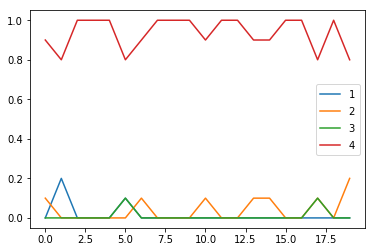

In [151]:
evaluate_q_learn(0.1, 0.1)

[[14.00821705 29.17517809 46.8448104  70.07063653]]
12901.740312199154


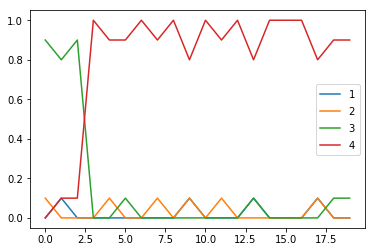

In [152]:
evaluate_q_learn(0.5, 0.1)

### Q1.d (10 punten)

Laten we nu kijken hoe succesvol de verschillende strategieën (lees combinatie van parameter waardes) zijn. 

Schrijf nu een loop die `q_learn` 500 keer aanroept met een bepaalde parameter setting (en altijd 200 leerrondes) en sla telkens het totaal aantal punten op, zodat je aan het eind een lijst hebt van 500 totaal scores. 

Vergelijk het gemiddelde van die 500 totaalscores voor $\alpha=0.1$, $\alpha=0.3$ en $\alpha=0.5$ met $\epsilon=0.1$ voor alle experimenten. Leg uit hoe de verschillen tot stand komen. 


Hoe sneller de robot leert, hoe sneller hij de beste keuzes kan maken om zijn score te optimaliseren, dus een hogere leersnelheid resulteert in een hogere totale score. 

In [153]:
def average_score(alpha, epsilon = 0.1, episodes = 500):
    result = []
    for _ in range(episodes):
        _, total_score, _ = q_learn(alpha, epsilon)
        result.append(total_score)
    
    # get the average score below
    return sum(result)/len(result)

In [154]:
average_score(0.1)

9866.464569431213

In [155]:
average_score(0.3)

11529.666131196353

In [156]:
average_score(0.5)

12314.835603540409

# Exploration-Exploitation

We gaan nu dieper in op het exploration vs. exploitation dilemma. Laten we eerst kijken hoe verschillende e parameters uitwerking hebben op het aantal punten dat gewonnen wordt. Gebruik hier de functie van q_learn van de vorige vraag met $\epsilon=0.05$, $\epsilon=0.2$ en $\epsilon=0.6$ en met $\alpha=0.3$ voor alle experimenten. 

### Q2.a (10 punten)

Kijk voor elke parameter setting weer naar de gemiddelde totaal score van 500 leer episodes. Waar ligt ongeveer het optimale niveau van exploratie?

Het optimale niveau van exploratie ligt in deze 3 gevallen bij 0.2

In [157]:
average_score(0.3, 0.05)

10945.99434940335

In [158]:
average_score(0.3, 0.2)

12031.842949871314

In [159]:
average_score(0.3, 0.6)

10558.601972876324

### Q2.b (10 punten)

Pas nu `q_learn` zo aan dat de parameter $\epsilon$ gedurende een leer episode steeds kleiner wordt. Dit kan bijvoorbeeld door elke ronde $\epsilon$ met een vast percentage te verkleinen (denk aan iets tussen 0 en 10%), maar andere manieren zijn ook mogelijk. Sla dit model op als `q_learn_decay`.

In [160]:
def q_learn_decay(alpha, epsilon, trials = 200):
    
    # initialize starting values
    Q = np.zeros((1, 4))
    total_score = 0
    means = [20, 30, 50, 70] 
    SD = 4   
    choices = np.zeros((4,trials))
    
    # loop over the trials
    for trial in range(trials):

        # choose action
        if random.random() < epsilon:
            
            # random action
            action = random.randint(0,3)
        else:
            
            # greedy action
            highest = max(Q[0])
            options = [x for x in range(len(Q[0])) if Q[0, x] == highest]
            action = random.choice(options)

        # get the reward for the action
        K = np.random.normal(means[action], SD)
        
        # update Q value
        Q[0, action] = update_Q(Q, K, 0, action, alpha)

        total_score += K
        
        choices[action, trial] = 1
        
        epsilon *= 0.9
        
    return Q, total_score, choices        

### Q2.c (10 punten)

Kijk nu naar een aantal beginwaarden voor parameter $\epsilon$, en kijk welk model meer punten kan verdienen in de taak (verken hier waarden van $\epsilon$ tussen .1 en .9). Gebruik weer het gemiddelde aantal punten over 500 leer episodes (en nog steeds 200 rondes per episode en $\alpha =  0.3$). Welk model is het beste en waarom denk je dat dit zo is?


Het model met epsilon = 0.9 is het beste model. Het begint met veel random stappen, dus hoge exploration, en later neemt hij door de decay steeds vaker de beste stappen, dus hoge exploitation. 

In [161]:
def average_score_decay(epsilon, alpha = 0.3, episodes = 500):
    result = []
    for _ in range(episodes):
        _, total_score, _ = q_learn_decay(alpha, epsilon)
        result.append(total_score)
    
    # get the average score below
    return sum(result)/len(result)

In [168]:
epsilons = np.linspace(0.1, 0.9, 17)

for epsilon in epsilons:
    a_s = average_score_decay(epsilon)
    print("The score is", a_s, "for epsilon =", epsilon)

The score is 9273.123481653674 for epsilon = 0.1
The score is 9528.845213013592 for epsilon = 0.15000000000000002
The score is 9695.508947243166 for epsilon = 0.2
The score is 10229.586118170166 for epsilon = 0.25
The score is 10524.626760643821 for epsilon = 0.30000000000000004
The score is 10829.50733169034 for epsilon = 0.35
The score is 10525.713243151777 for epsilon = 0.4
The score is 10854.763968049732 for epsilon = 0.45000000000000007
The score is 11151.903697043199 for epsilon = 0.5
The score is 11312.62994122708 for epsilon = 0.55
The score is 11552.041667596222 for epsilon = 0.6
The score is 11725.176071511969 for epsilon = 0.65
The score is 11951.875617117757 for epsilon = 0.7000000000000001
The score is 11855.606565818984 for epsilon = 0.75
The score is 12120.802849672262 for epsilon = 0.8
The score is 12279.093014418768 for epsilon = 0.85
The score is 12379.718997836 for epsilon = 0.9


## Softmax

Een andere zeer populaire methode om exploratie te implementeren is de softmax regel. Deze kan gebruikt worden om de waarschijnlijkheid uit te rekenen dat de robot een specifieke kist kiest. Bijvoorbeeld de waarschijnlijkheid dat de robot op een bepaald moment kist 1 kiest is:

$$P(Q(1)) = \frac{e(Q(1)*theta)}{\sum_s e(Q(s)*theta)}$$

Voor kist 2:

$$P(Q(2)) = \frac{e(Q(2)*theta)}{\sum_s e(Q(s)*theta)}$$

En natuurlijk:

$$P(Q(1))+ P(Q(2)) +P(Q(3))+ P(Q(2)) = 1  (100\%)$$

want de robot kiest altijd een van de 4 opties, dus samen moeten dat 100% kans zijn.

Implementeer nu de softmax regel in de `q_learn` functie en geef deze de naam `q_learn_softmax`.

* Gebruik elke ronde de $P(Q)$ informatie om de robot een kist te laten kiezen.
* Zorg ook dat deze elke ronde de waarschijnlijkheid $P(Q)$ van het kiezen van elke kist wordt opgeslagen zodat we hier later weer naar kunnen kijken. 

Gebruik dit model weer om de gemiddelde score voor 500 episodes voor verschillende waardes van theta (waardes tussen $0.01$ en $1$, op zn minst 5) met elkaar te vergelijken, met wederom 200 rondes per episode en een $\alpha$ van $0.3$, gebruik makende van de methode die we hier boven ontwikkeld hebben. 


### Q3.a (10 punten)

Wat is ongeveer de optimale waarde voor theta, hoe verhoud dit model zich tot de simpele versie van $\epsilon$-greedy? Hoe gedraagt het model zicht met een hoge waarde van theta, en hoe met een lage?

De optimale waarde voor theta is ongeveer 0.065. Rond de optimale waarde voor theta doet dit model het beter dan $\epsilon$-greedy, maar voor de rest een stuk slechter. Bij een hoge waarde van theta doet dit model het slechter en bij een lagere waarde beter.

In [3]:
def softmax(Q, s, a, theta):
    total = [np.exp(x*theta) for x in Q[s]]
    return np.exp(Q[s, a]*theta)/sum(total)
    

def calculate_softmax(Q, theta):
    P = np.zeros(Q.shape)
    for action in range(len(Q[0])):
        P[0,action] = softmax(Q, 0, action, theta)
    return P

def pick_action(P, rng):
    
    total = 0
    
    for index in range(len(P[0])):
        
        total += P[0, index]
        
        if total > rng:
            return index
        

def q_learn_softmax(alpha, theta, trials = 200):
    
    # initialize starting values
    Q = np.zeros((1, 4))
    total_score = 0
    means = [20, 30, 50, 70] 
    SD = 4   
    choices = np.zeros((4,trials))
    
    # loop over the trials
    for trial in range(trials):

        # get the softmax values
        P = calculate_softmax(Q, theta)
        
        rng = random.random()
        action = pick_action(P, rng)

        # get the reward for the action
        K = np.random.normal(means[action], SD)
        
        # update Q value
        Q[0, action] = update_Q(Q, K, 0, action, alpha)

        total_score += K
        
        choices[action, trial] = 1
        
    return Q, total_score, choices    

In [4]:
def average_score_softmax(theta, alpha = 0.3, episodes = 500):
    result = []
    for _ in range(episodes):
        _, total_score, _ = q_learn_softmax(alpha, theta)
        result.append(total_score)
    
    # get the average score below
    return sum(result)/len(result)

In [165]:
average_score_softmax(0.1, 0.3, 1)

10893.618033676239

In [166]:
thetas = np.linspace(0.01, 1, 19)

for theta in thetas:
    a_s = average_score_softmax(theta)
    print("The score is", a_s, "for theta =", theta)

The score is 9208.691241868015 for theta = 0.01
The score is 12595.819994487192 for theta = 0.065
The score is 12264.24121490115 for theta = 0.12
The score is 11641.389481731821 for theta = 0.17500000000000002
The score is 10815.454531903533 for theta = 0.23
The score is 9855.417117237323 for theta = 0.28500000000000003
The score is 9637.490853164792 for theta = 0.34
The score is 9226.29283886445 for theta = 0.395
The score is 8965.243430359908 for theta = 0.45
The score is 8850.346878095117 for theta = 0.505
The score is 9111.371149235181 for theta = 0.56
The score is 8603.471156929108 for theta = 0.615
The score is 8491.542697226856 for theta = 0.67
The score is 8518.638870020784 for theta = 0.725
The score is 8312.032797460768 for theta = 0.78
The score is 8551.41396013682 for theta = 0.835
The score is 8630.166932462682 for theta = 0.89
The score is 8451.820408163687 for theta = 0.9450000000000001
The score is 8481.955663293691 for theta = 1.0


## Model fitting

We gaan nu kijken naar de resultaten van een echt experiment. We hebben de data van een proefpersoon die het bovenstaande experiment heeft gespeeld. In de data file kunnen we terugvinden welke van de 4 opties zij gekozen had en hoeveel punten vervolgens elke trial verdient zijn. We gaan kijken met welke parameter waardes  Q-learning met een softmax choice rule het gedrag van de proefpersonen het beste kan voorspellen. De proefpersoon heeft 80 rondes gespeelt. 

Lees de data in uit *L4_data_1.txt* met behulp van [loadtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html):
```python
with open("L4_data_1.txt") as f:
    data = np.loadtxt(f, dtype=int, delimiter="\t", skiprows=1)
```

Pas de `q_learn_softmax` functie aan zodat je deze op de data van de proefpersonen kan fitten. (Zie LC1 voor details over hoe functies gefit moeten worden, en pseudo code onderaan voor meer hulp).

Ga er van uit dat de proefpersonen enige ervaring hebben met dit type experiment en verwachten dat ze gemiddeld wel 40 punten per ronde gaan verdienen (alle Q’s starten op 40 ipv 0). 

We gaan voor het fitten van het model gebruik maken van minimize van scipy.optimize (`from scipy.optimize import minimize`) en we gaan proberen *Log Likelihood* te optimaliseren (mate van fit). 

Wat we op elke trial willen weten is wat de waarschijnlijkheid is dat het model dezelfde keuze maakte als de proefpersoon. Hoe groter de kans (likelihood) dat het model correct kiest, hoe beter het model "fit". 

In het databestand van de proefpersoon kunnen zien welke van de 4 kisten de proefpersoon koos. Dit kunnen we dan op elke ronde vergelijken met de corresponderende P(Q). In de eerste ronde zijn alle Q values nog gelijk dus zijn alle P(Q)s = .25.

Voor de eerste ronde geld daarom automatisch dan waarschijnlijkheid (likelihood) van de keuze van de proefpersoon ook .25 is, maar dat gaat veranderen naarmate er geleerd wordt. 

In het databestand staat ook voor elke ronde wat de uitkomst van een keuze was, deze moet gebruikt worden om vervolgens de Q-values aan te passen, net als we eerder gedaan hebben in de simulaties.

De output van deze functie moet de som van alle *log(P(Q(chosen)))* zijn. Let op vermenigvuldig deze som met -1. Dat doen we omdat minimize de functie probeert te minimaliseren , en we opzoek zijn naar de max LL (double negative). 

`**pseudo code**:`
```python
def q_learn_softmax_fit(params):
    alpha, theta, init_value = params
    nArms = 4
    Q = np.array([init_value]*nArms)
    LL = 0
    
    for row in data:
        probs <- calculate probability of chosing each option based on theta, Qvalues and softmax
        
        choice <- read choice from data (each trial is one row in file)
        outcome <- read outcomee of choice from data
        
        LL += np.log(probs[choice])
        
        Q[choice] <- update Q value
    
    # Scaled for minimize function
    return -1*LL

# minimize takes a few arguments (function, array of initial parameter values, minimization methods,
# bounds are the bounds on each parameter; use bounds (same, same) to fix parameter to a single value
res = minimize(q_learn_softmax_fit, np.array([0.5, 0.5, 40]), method='SLSQP',
               bounds=[(0,1), (0,10), (40,40)], options={'disp':True, 'ftol':1e-16})
```

### Q4.a (10 punten)

Welke parameterwaarden fitten de data van de proefpersoon het beste? Probeer eens een hogere start waarde voor Q values (>80) en hoe beïnvloed dit de model fit? 
minimize geeft ook de uiteindelijke summed LL (negatief) van het best fittende model. Deze score kan je weer omrekenen naar een gemiddelde likelihood (kans dat model juiste trial koos) per trial. Doe dit, een beoordeel de uitkomst.

De parameterwaarden die uit minimize komen zijn $\alpha =  0.48925202$, $\theta = 0.23180105$. Een hogere startwaarde voor de Q values resulteert in dezelfde waarden voor $\alpha$ en $\theta$. De uiteindelijke summed LL is 56.081857619579395. [...]

In [7]:
with open("L4_data_1.txt") as f:
    data = np.loadtxt(f, dtype=int, delimiter="\t", skiprows=1)

In [56]:
def q_learn_softmax_fit(params):
    alpha, theta, init_value = params
    nArms = 4
    Q = np.array([[init_value]*nArms])
    LL = 0

    for row in data:
        
        # get the softmax values
        P = calculate_softmax(Q, theta)

        choice = row[1]-1
        outcome = row[2]
        
        LL += np.log(P[0,choice])

        Q[0,choice] = update_Q(Q, outcome, 0, choice, alpha)

    # Scaled for minimize function
    return -1*LL

In [57]:
from scipy.optimize import minimize

# minimize takes a few arguments (function, array of initial parameter values, minimization methods,
# bounds are the bounds on each parameter; use bounds (same, same) to fix parameter to a single value
res = minimize(q_learn_softmax_fit, np.array([0.5, 0.5, 40]), method='SLSQP',
               bounds=[(0,1), (0,10), (40,40)], options={'disp':True, 'ftol':1e-16})
res

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 56.081857619579395
            Iterations: 12
            Function evaluations: 80
            Gradient evaluations: 12


     fun: 56.081857619579395
     jac: array([ 9.53674316e-07, -4.76837158e-07,  4.02761698e+00])
 message: 'Optimization terminated successfully.'
    nfev: 80
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([ 0.48925202,  0.23180105, 40.        ])

In [48]:
# minimize takes a few arguments (function, array of initial parameter values, minimization methods,
# bounds are the bounds on each parameter; use bounds (same, same) to fix parameter to a single value
res = minimize(q_learn_softmax_fit, np.array([0.5, 0.5, 80]), method='SLSQP',
               bounds=[(0,1), (0,10), (40,40)], options={'disp':True, 'ftol':1e-16})
res

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 56.081857619579395
            Iterations: 12
            Function evaluations: 80
            Gradient evaluations: 12


     fun: 56.081857619579395
     jac: array([ 9.53674316e-07, -4.76837158e-07,  4.02761698e+00])
 message: 'Optimization terminated successfully.'
    nfev: 80
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([ 0.48925202,  0.23180105, 40.        ])

### Q4.b (10 punten)

Herschrijf de functie nogmaals en zorg ervoor dat de initialisatie van de Q waarde (de start Q waarden) ook een vrije parameter wordt. Als je dit doet kan je de start waarde vinden die het best bij het gedrag van de proefpersoon past. Rapporteer, en interpreteer deze waarde. En zorgt dit ook voor een betere model fit?

De parameterwaarden die nu uit minimize komen zijn $\alpha = 0.57894821$, $\theta = 0.25470942$ en $init\_value = 24.07207659$. Dit betekent dat de verwachting van de proefpersoon in het begin dus op ongeveer 24 punten moet zitten. De functiewaardie is hier ongeveer 26.01, en bij Q4.a was het 56.08. Dit houdt in dat [...]

In [50]:
# minimize takes a few arguments (function, array of initial parameter values, minimization methods,
# bounds are the bounds on each parameter; use bounds (same, same) to fix parameter to a single value
res = minimize(q_learn_softmax_fit, np.array([0.5, 0.5, 40]), method='SLSQP',
               bounds=[(0,1), (0,10), (0,100)], options={'disp':True, 'ftol':1e-16})
print(res)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 26.010035104746027
            Iterations: 19
            Function evaluations: 113
            Gradient evaluations: 19
     fun: 26.010035104746027
     jac: array([1.43051147e-06, 3.33786011e-06, 2.38418579e-07])
 message: 'Optimization terminated successfully.'
    nfev: 113
     nit: 19
    njev: 19
  status: 0
 success: True
       x: array([ 0.57894821,  0.25470942, 24.07207659])


### Q4.c (10 punten)

Als we de functie een klein beetje herschrijven kunnen we deze gebruiken om in het hoofd van de proefpersoon te kijken. Bijvoorbeeld we willen nu weten welke Q-values zij aan de verschillende bandits toekent. 

Hiervoor is alleen een kleine verandering nodig, waarbij de functie nu niet meer de LogLikelihood als output heeft maar de lijst met Q values. Pas de functie `q_learn_softmax_fit` aan zodat deze de Q-values returnt en noem de nieuwe functie `q_learn_fitted_model`. Zorg hierbij dat de `params` lijst van argumenten ook hetzelfde blijft als bij de `q_learn_softmax_fit`.

Nu hoef je ook niet meer de functie fitten of minimalizeren maar alleen aan te roepen, gebruik makende van de beste gevonden `params` van de vorige stap.

`q_learn_fitted_model(res.x)`

Rapporteer de Q values van deze proefpersoon. In werkelijkheid waren de gemiddelde waardes van den bandits (50, 30, 20, 80). Hoe wijkt de proefpersoon hier van af en hoe is dat te verklaren (hint: kijk naar keuze gedrag, dus de selectie van bandits, in de data file)?


De proefpersoon zit dicht in de buurt van de gemiddelde waardes van de bandits. De proefpersoon heeft een afwijking van maximaal 5 punten, en de afwijking is het grootst bij de 2e en 3e schatkist. Dit kan komen doordat de proefpersoon bijna alleen maar voor de 1e en de 4e schatkist heeft gekozen. Hierdoor heeft hij weinig kunnen leren over schatkist 2 en 3. 

In [24]:
def q_learn_fitted_model(params):
    alpha, theta, init_value = params
    nArms = 4
    Q = np.array([[init_value]*nArms])
    
    for row in data:
        
        # get the softmax values
        P = calculate_softmax(Q, theta)

        choice = row[1]-1
        outcome = row[2]

        Q[0,choice] = update_Q(Q, outcome, 0, choice, alpha)

    # Scaled for minimize function
    return Q

In [53]:
q_learn_fitted_model(res.x)

array([[49.49995203, 25.76719261, 22.29350334, 78.6222417 ]])